In [25]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/datasets/games.csv",sep = ',',header = 0, encoding = 'ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df.head()

,player level,Mission names,users Starting mission,Skipped mission,Premium currency cost of skip
0,2,Chapter1_mission1,423 821,2668,15
1,2,Chapter1_mission2,225 147,2599,15
2,2,Chapter1_mission3,130 801,2829,15
3,2,Chapter1_mission4,59 202,3657,15
4,2,Chapter1_mission5,27 508,529,75


In [27]:
len(df['Mission names'].unique())

51

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   player level                   2040 non-null   int64 
 1   Mission names                  2040 non-null   object
 2   users Starting mission         2040 non-null   object
 3   Skipped mission                2040 non-null   int64 
 4   Premium currency cost of skip  2040 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 79.8+ KB


In [ ]:
df['Skipped_player_per_mission'] = df['users Starting mission'] - 

{'boxes': [<matplotlib.lines.Line2D at 0x7f4978810bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f497a0f2590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f497a0ecc90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f497a0ec750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f497a0f2bd0>,
  <matplotlib.lines.Line2D at 0x7f497a0f2210>]}

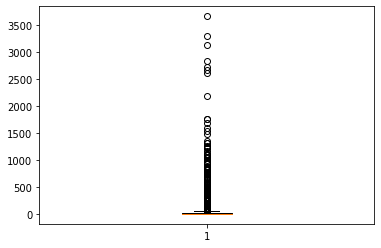

In [29]:
plt.boxplot(df['Skipped mission'])

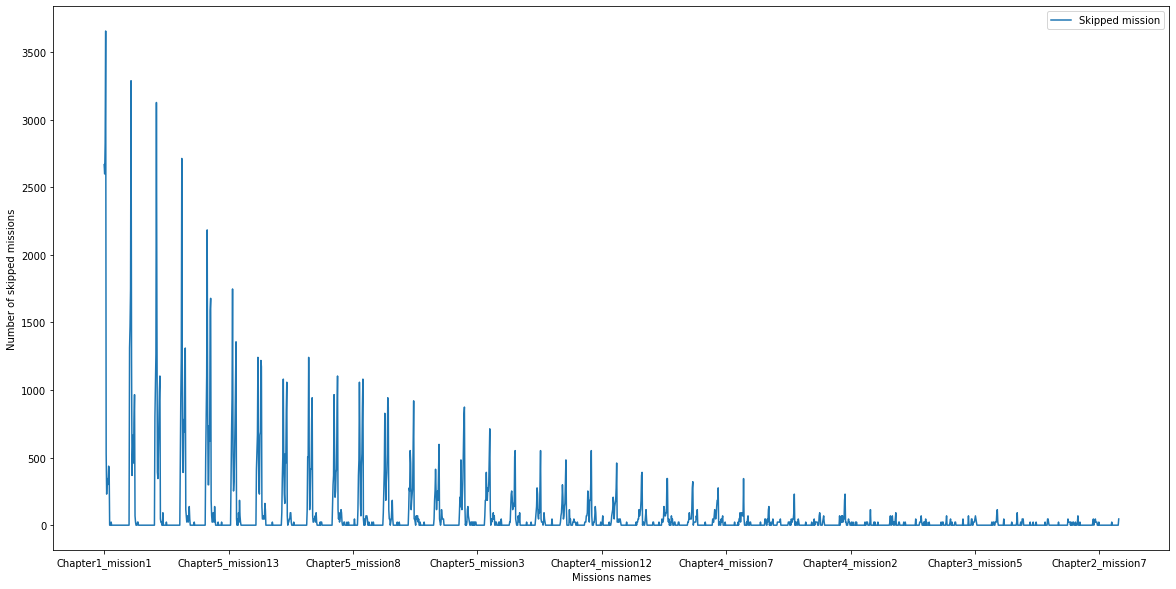

In [34]:
import matplotlib.pyplot as plt
df.plot(x = 'Mission names', y = 'Skipped mission', figsize=(20,10))
plt.ylabel('Number of skipped missions')
plt.xlabel('Missions names')
plt.show()

In [35]:
df.head()

,player level,Mission names,users Starting mission,Skipped mission,Premium currency cost of skip
0,2,Chapter1_mission1,423 821,2668,15
1,2,Chapter1_mission2,225 147,2599,15
2,2,Chapter1_mission3,130 801,2829,15
3,2,Chapter1_mission4,59 202,3657,15
4,2,Chapter1_mission5,27 508,529,75


In [36]:
df['player level'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41])

In [40]:
player_level_sum = pd.pivot_table(df, index=['player level'],values=['users Starting mission','Skipped mission','Premium currency cost of skip'], aggfunc=np.sum)
player_level_mean = pd.pivot_table(df, index=['player level'],values=['users Starting mission','Skipped mission','Premium currency cost of skip'], aggfunc=np.mean)


In [45]:
player_level_sum = player_level_sum.reset_index()

Text(0.5, 0, 'player level')

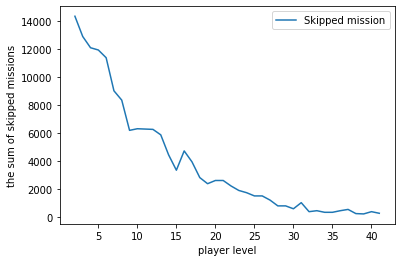

In [65]:
player_level_sum.plot(x= 'player level', y='Skipped mission')
plt.ylabel('the sum of skipped missions')
plt.xlabel('player level')

In [55]:
df['cost'] = df['Skipped mission'] * df['Premium currency cost of skip']

In [66]:
cost_table = pd.pivot_table(df, index=['player level'],values=['cost'], aggfunc=np.sum)

In [67]:
cost_table = cost_table.reset_index()

In [68]:
cost_table['cost'].sum()

4491210

Text(0, 0.5, 'sum of the money generated')

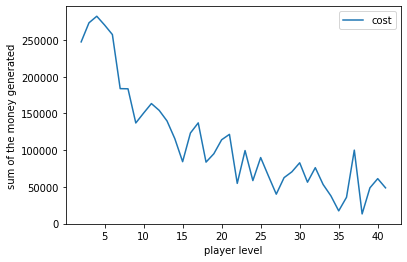

In [69]:
cost_table.plot(x= 'player level', y='cost')
plt.xlabel('player level')
plt.ylabel('sum of the money generated')